In [9]:
import os
from pathlib import Path
import mne
import json

In [10]:
filtered = True

In [11]:
bids_root  = Path("D:/ScalpData/jhh_round4")
raw_dir = bids_root / "sourcedata"
ica_dir = bids_root / "derivatives" / "ICA"
pt_map_fpath = "D:/Desktop/ezscalp/scripts/jhu_pt_map.json"

In [12]:
with open(pt_map_fpath) as f:
    pt_map = json.load(f)

In [13]:
source_ptID = "46"
source_fpath = raw_dir / f"{source_ptID}.edf"
ica_ptID = pt_map[source_ptID]
ica_fpath = ica_dir / f"{ica_ptID}.set"
raw_fpath = source_fpath
if filtered:
    raw_fpath = ica_fpath

In [14]:
raw = None
if not filtered:
    raw = mne.io.read_raw_edf(raw_fpath)
    raw.load_data()
    raw= raw.filter(0.5,40)
else:
    raw =  mne.io.read_raw_eeglab(raw_fpath)   

Reading D:\ScalpData\jhh_round4\derivatives\ICA\017.fdt


<ipython-input-14-b9397ad566b5>:7: RuntimeWarning: Data file name in EEG.data (46.fdt) is incorrect, the file name must have changed on disk, using the correct file name (017.fdt).
  raw =  mne.io.read_raw_eeglab(raw_fpath)


<IPython.core.display.Javascript object>


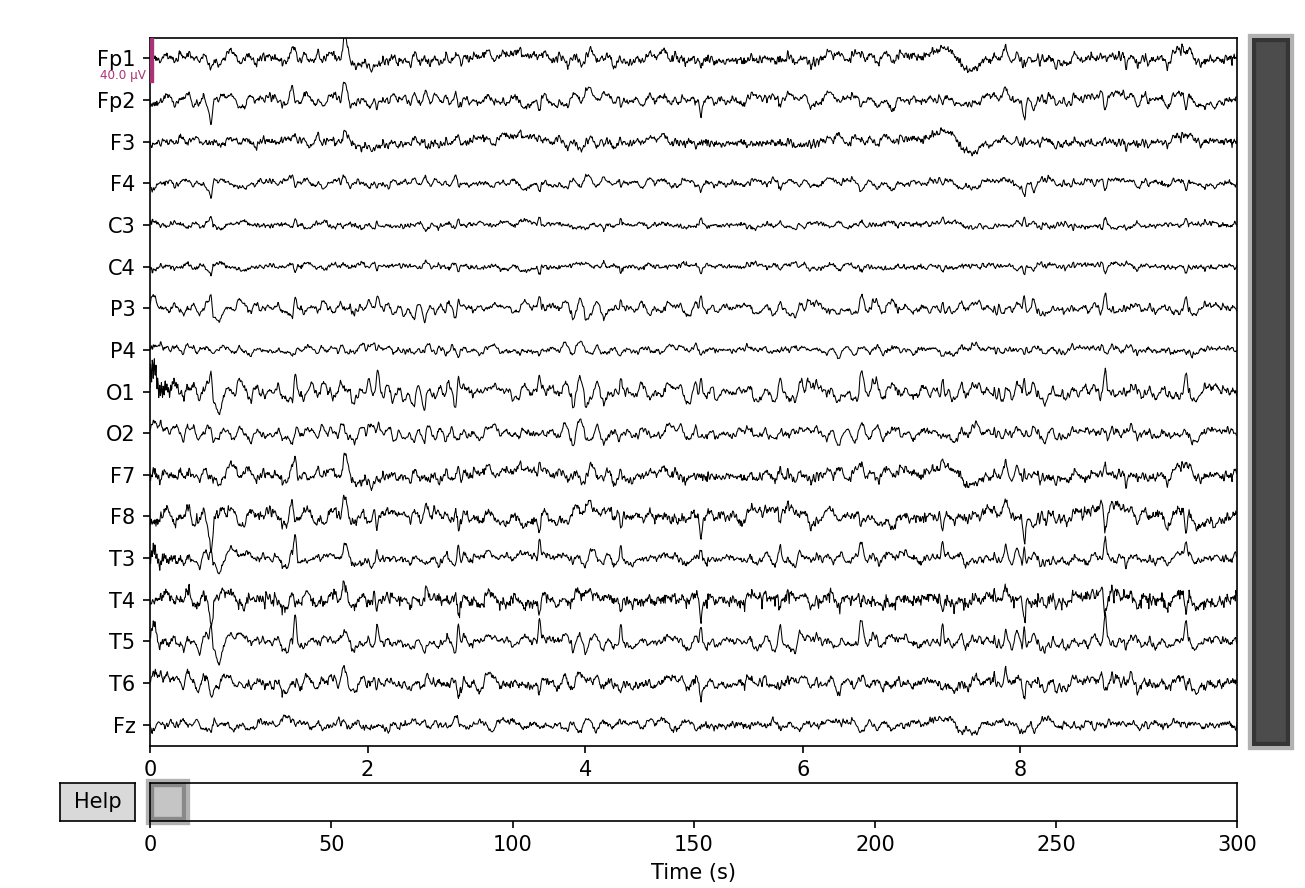

<IPython.core.display.Javascript object>


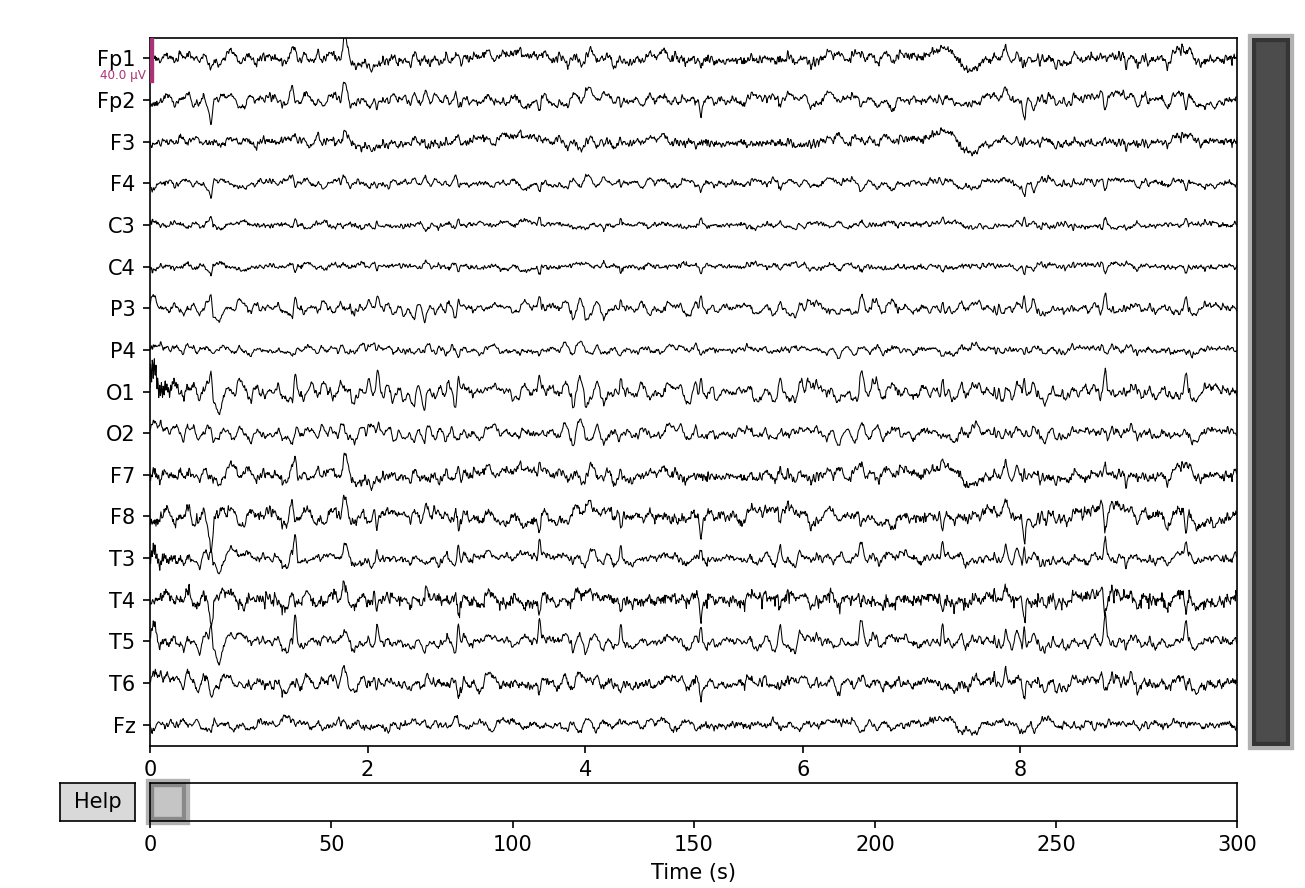

In [15]:
%matplotlib notebook
raw.plot()